Problem Definition: 

A machine learning model is to be developed to predict customers who are likely to churn (leave the company). Before building the model, it is essential to perform data analysis and feature engineering steps.

The Telco customer churn dataset contains information about 7,043 customers of a fictional telecommunications company that provides home phone and internet services in California during the third quarter. It includes details about whether a customer has stayed, left, or signed up for the service.

Dataset Information: 

21 Variables, 7,043 Observations.
Each row represents a unique customer. 
The variables include information on customer services, account details, and demographics.
Services include: phone service, multiple lines, internet, online security, online backup, device protection, tech support, streaming TV and movies.
Account details: tenure, contract type, payment method, paperless billing, monthly and total charges.
Demographics: gender, senior citizen status, partner, and dependents.

TASK 1: EXPLORATORY DATA ANALYSIS (EDA)

Step 1: Examine the overall structure of the dataset
Step 2: Identify numerical and categorical variables
Step 3: Analyze numerical and categorical variables
Step 4: Analyze the target variable (Mean churn by categorical variables, Mean of numerical variables by churn)
Step 5: Perform outlier detection
Step 6: Analyze missing values
Step 7: Perform correlation analysis

TASK 2: DATA CLEANING

Step 1: Apply necessary procedures for missing and outlier values

In [517]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
!pip install missingno
import missingno as msno
from datetime import date

from scipy.optimize import anderson
from skimage.feature import shape_index
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

def telco_load():
    data = pd.read_csv("/Users/ozkan/OneDrive/Desktop/Feature_Engineering/Telco-Customer-Churn.csv")
    return data

In [518]:
df = telco_load()
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.100,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150,3487.95,No


In [519]:
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [520]:
df.isnull().values.any()

False

In [521]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [522]:
df=df.drop_duplicates(subset="customerID", keep='first')

In [523]:
df.shape

(7043, 21)

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [525]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [526]:
df["TotalCharges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [527]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800


In [528]:
df["SeniorCitizen"].value_counts()  #SeniorCitizen is actually a categoric variable.

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [529]:
def col_names_grab(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [530]:
cat_cols, num_cols, cat_but_car = col_names_grab(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [531]:
print(f"Categoric Variable : {cat_cols}")
print(f"Numeric Variable : {num_cols}")

Categoric Variable : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']
Numeric Variable : ['tenure', 'MonthlyCharges', 'TotalCharges']


In [532]:
for col in cat_cols:
    freq_table = pd.DataFrame({'Frequence' : df[col].value_counts(),
                               'Ratio%' : df[col].value_counts(normalize=True)*100}).reset_index()
    display(freq_table)

,gender,Frequence,Ratio%
0,Male,3555,50.476
1,Female,3488,49.524


,Partner,Frequence,Ratio%
0,No,3641,51.697
1,Yes,3402,48.303


,Dependents,Frequence,Ratio%
0,No,4933,70.041
1,Yes,2110,29.959


,PhoneService,Frequence,Ratio%
0,Yes,6361,90.317
1,No,682,9.683


,MultipleLines,Frequence,Ratio%
0,No,3390,48.133
1,Yes,2971,42.184
2,No phone service,682,9.683


,InternetService,Frequence,Ratio%
0,Fiber optic,3096,43.959
1,DSL,2421,34.375
2,No,1526,21.667


,OnlineSecurity,Frequence,Ratio%
0,No,3498,49.666
1,Yes,2019,28.667
2,No internet service,1526,21.667


,OnlineBackup,Frequence,Ratio%
0,No,3088,43.845
1,Yes,2429,34.488
2,No internet service,1526,21.667


,DeviceProtection,Frequence,Ratio%
0,No,3095,43.944
1,Yes,2422,34.389
2,No internet service,1526,21.667


,TechSupport,Frequence,Ratio%
0,No,3473,49.311
1,Yes,2044,29.022
2,No internet service,1526,21.667


,StreamingTV,Frequence,Ratio%
0,No,2810,39.898
1,Yes,2707,38.435
2,No internet service,1526,21.667


,StreamingMovies,Frequence,Ratio%
0,No,2785,39.543
1,Yes,2732,38.790
2,No internet service,1526,21.667


,Contract,Frequence,Ratio%
0,Month-to-month,3875,55.019
1,Two year,1695,24.066
2,One year,1473,20.914


,PaperlessBilling,Frequence,Ratio%
0,Yes,4171,59.222
1,No,2872,40.778


,PaymentMethod,Frequence,Ratio%
0,Electronic check,2365,33.579
1,Mailed check,1612,22.888
2,Bank transfer (automatic),1544,21.922
3,Credit card (automatic),1522,21.610


,Churn,Frequence,Ratio%
0,No,5174,73.463
1,Yes,1869,26.537


,SeniorCitizen,Frequence,Ratio%
0,0,5901,83.785
1,1,1142,16.215


In [533]:
'''
for i in range(0, len(cat_cols), 2):
    cols_to_plot = cat_cols[i:i+2]
    n = len(cols_to_plot)
    fig, axes = plt.subplots(1, n, figsize=(5.7 * n, 3))

    if n == 1:
        axes = [axes]

    for ax, col in zip(axes, cols_to_plot):
        total = len(tel[col])
        order = tel[col].value_counts().index

        sns.countplot(data=tel, x=col, hue=col, order=order, ax=ax, palette="Set2", legend=False)

        for p in ax.patches:
            count = int(p.get_height())
            percent = 100 * count / total
            ax.annotate(f'{percent:.1f}%',
                        (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='top', fontsize=9, color='black', fontweight='bold')

        ax.tick_params(axis='x', labelsize=7)
        ax.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()
'''


'\nfor i in range(0, len(cat_cols), 2):\n    cols_to_plot = cat_cols[i:i+2]\n    n = len(cols_to_plot)\n    fig, axes = plt.subplots(1, n, figsize=(5.7 * n, 3))\n\n    if n == 1:\n        axes = [axes]\n\n    for ax, col in zip(axes, cols_to_plot):\n        total = len(tel[col])\n        order = tel[col].value_counts().index\n\n        sns.countplot(data=tel, x=col, hue=col, order=order, ax=ax, palette="Set2", legend=False)\n\n        for p in ax.patches:\n            count = int(p.get_height())\n            percent = 100 * count / total\n            ax.annotate(f\'{percent:.1f}%\',\n                        (p.get_x() + p.get_width() / 2, p.get_height()),\n                        ha=\'center\', va=\'top\', fontsize=9, color=\'black\', fontweight=\'bold\')\n\n        ax.tick_params(axis=\'x\', labelsize=7)\n        ax.tick_params(axis=\'y\', labelsize=7)\n\nplt.tight_layout()\nplt.show()\n'

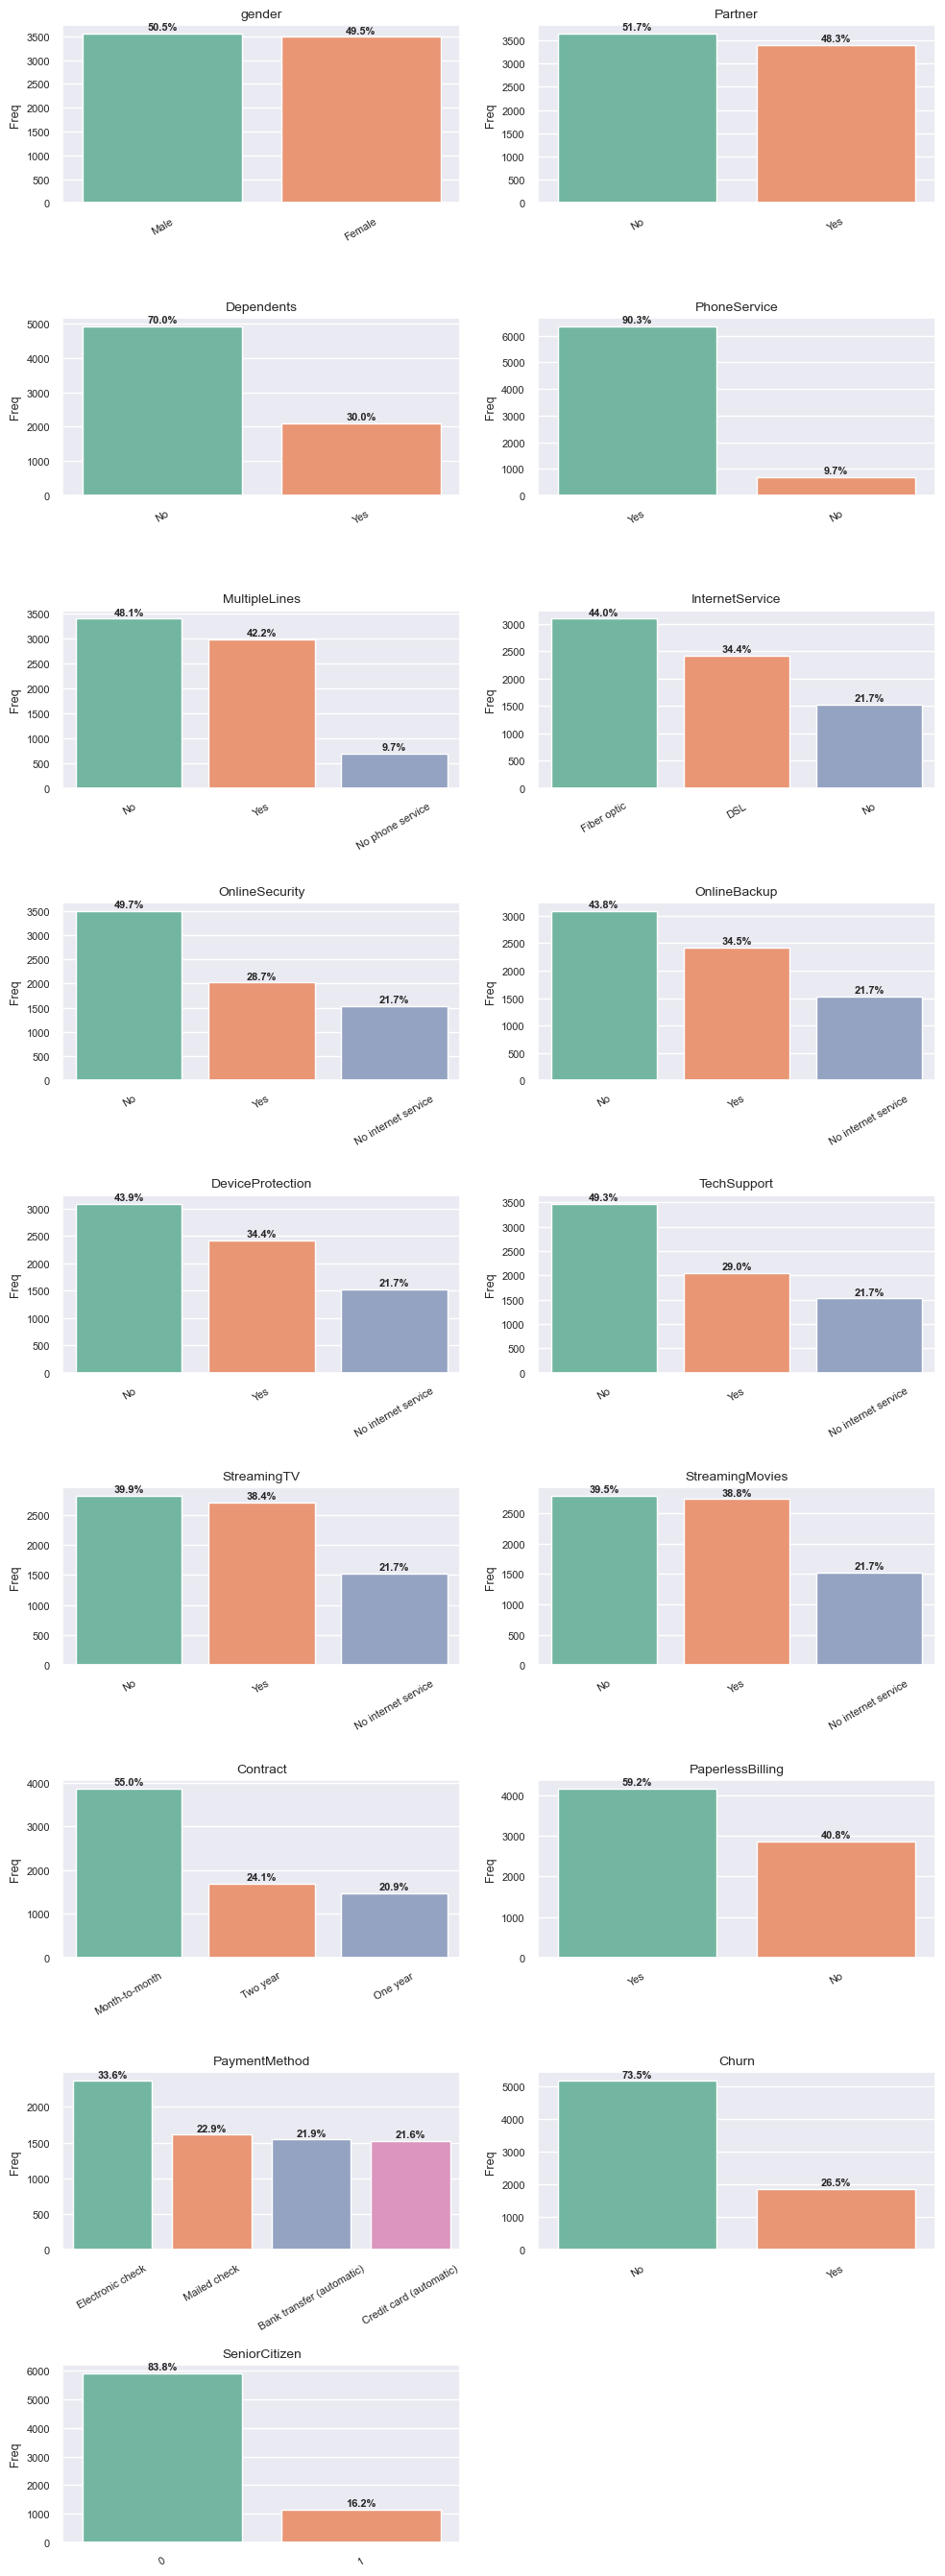

In [534]:
import math

# 2 graph per row
num_plots = len(cat_cols)
plots_per_row = 2
num_rows = math.ceil(num_plots / plots_per_row)

# Create figure and axes
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(10, 3 * num_rows))
axes = axes.flatten()  # flatten 2D array

# Draw grapg for each cat_cols
for idx, col in enumerate(cat_cols):
    ax = axes[idx]
    
    freq = df[col].value_counts()
    ratio = df[col].value_counts(normalize=True) * 100

    freq_df = pd.DataFrame({
        'Category': freq.index,
        'Frequency': freq.values,
        'Ratio (%)': ratio.values
    })

    sns.barplot(data=freq_df, x='Category', y='Frequency', hue='Category', palette='Set2', ax=ax, legend=False)

    # Write ratio
    for i, row in freq_df.iterrows():
        ax.text(i, row['Frequency'] + max(freq_df['Frequency']) * 0.01,
                f"{row['Ratio (%)']:.1f}%", ha='center', va='bottom', fontsize=8, fontweight='bold')

    ax.set_title(f"{col}", fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("Freq", fontsize=9)
    ax.tick_params(axis='x', rotation=30, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Delete empty graph boxes
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

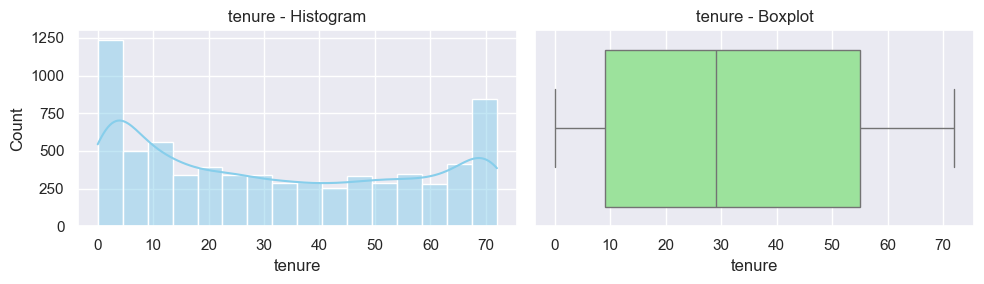

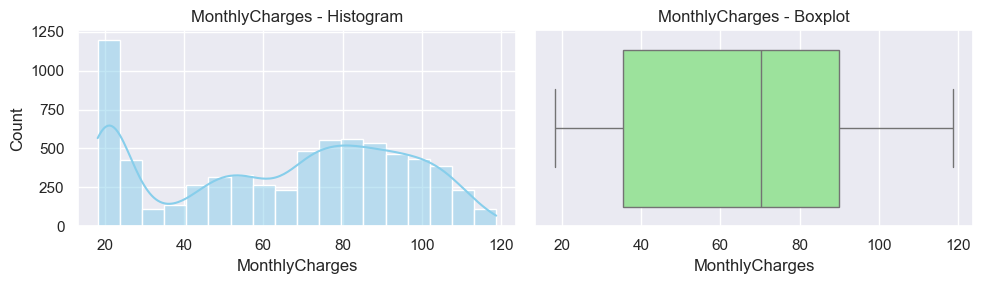

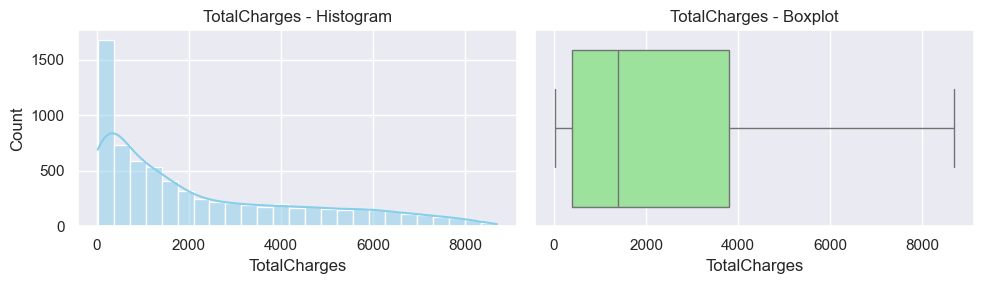

In [535]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw histogram and boxplot for each numeric variable
for col in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))

    sns.histplot(df[col], kde=True, ax=axs[0], color="skyblue")
    axs[0].set_title(f"{col} - Histogram")

    sns.boxplot(x=df[col], ax=axs[1], color="lightgreen")
    axs[1].set_title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

In [536]:
df[df["tenure"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,NaN,No


In [537]:
df.groupby("Churn")[num_cols].mean().T

Churn,No,Yes
tenure,37.570,17.979
MonthlyCharges,61.265,74.441
TotalCharges,2555.344,1531.796


                tenure  MonthlyCharges  TotalCharges
tenure           1.000           0.248         0.826
MonthlyCharges   0.248           1.000         0.651
TotalCharges     0.826           0.651         1.000


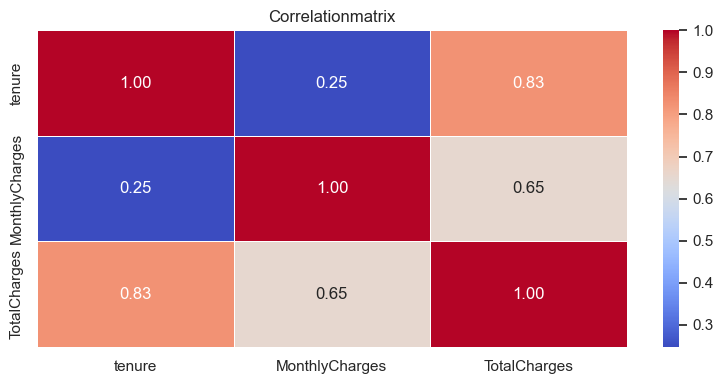

In [538]:
# Checking Corr
df_cor = df[num_cols].corr()
print(df_cor)

# Heat map
plt.figure(figsize=(8,4))
sns.heatmap(df_cor, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlationmatrix")
plt.tight_layout()
plt.show()

In [539]:
df["Num_Churn"] = df["Churn"].map({"Yes" : 1, "No" : 0})

In [540]:
for col in cat_cols:
    if col != "Churn":
        churn_rate = df.groupby(col)["Num_Churn"].mean().sort_values(ascending=False)
        print(f"\nChurn Rate / Variables {col} :\n")
        print(churn_rate)


Churn Rate / Variables gender :

gender
Female   0.269
Male     0.262
Name: Num_Churn, dtype: float64

Churn Rate / Variables Partner :

Partner
No    0.330
Yes   0.197
Name: Num_Churn, dtype: float64

Churn Rate / Variables Dependents :

Dependents
No    0.313
Yes   0.155
Name: Num_Churn, dtype: float64

Churn Rate / Variables PhoneService :

PhoneService
Yes   0.267
No    0.249
Name: Num_Churn, dtype: float64

Churn Rate / Variables MultipleLines :

MultipleLines
Yes                0.286
No                 0.250
No phone service   0.249
Name: Num_Churn, dtype: float64

Churn Rate / Variables InternetService :

InternetService
Fiber optic   0.419
DSL           0.190
No            0.074
Name: Num_Churn, dtype: float64

Churn Rate / Variables OnlineSecurity :

OnlineSecurity
No                    0.418
Yes                   0.146
No internet service   0.074
Name: Num_Churn, dtype: float64

Churn Rate / Variables OnlineBackup :

OnlineBackup
No                    0.399
Yes              

In [541]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Num_Churn            0
dtype: int64

<Axes: >

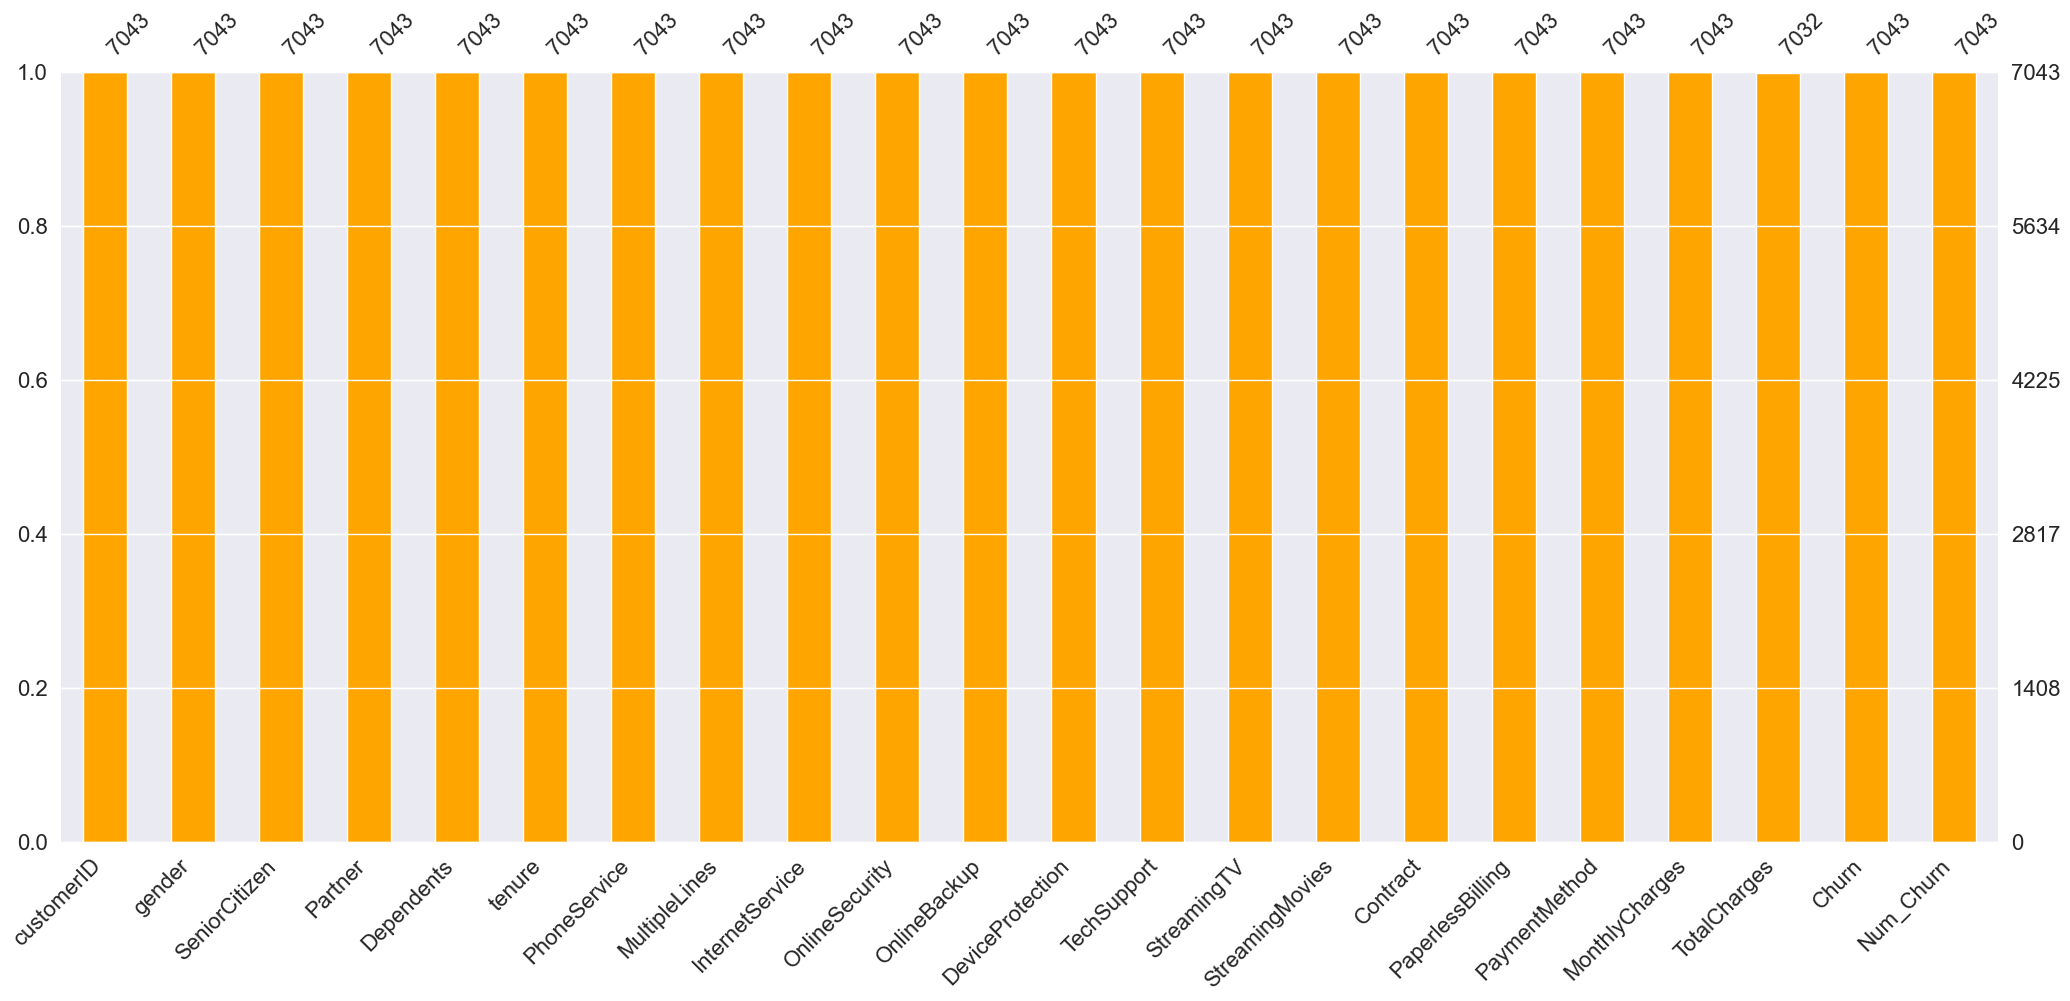

In [542]:
msno.bar(df, color = "orange")

In [543]:
df.isnull().sum() / df.shape[0] * 100

customerID         0.000
gender             0.000
SeniorCitizen      0.000
Partner            0.000
Dependents         0.000
tenure             0.000
PhoneService       0.000
MultipleLines      0.000
InternetService    0.000
OnlineSecurity     0.000
OnlineBackup       0.000
DeviceProtection   0.000
TechSupport        0.000
StreamingTV        0.000
StreamingMovies    0.000
Contract           0.000
PaperlessBilling   0.000
PaymentMethod      0.000
MonthlyCharges     0.000
TotalCharges       0.156
Churn              0.000
Num_Churn          0.000
dtype: float64

In [544]:
df_dropped = df[~df["TotalCharges"].isnull()]
df_dropped2 = df.dropna(subset=["TotalCharges"])

In [545]:
df_dropped.shape

(7032, 22)

In [546]:
df_dropped2.shape

(7032, 22)

In [609]:
df["TotalCharges_New"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [611]:
df["TotalCharges"] = df.apply(
    lambda row : row["MonthlyCharges"] if pd.isna(row["TotalCharges"]) and row["tenure"] == 0
    else row["MonthlyCharges"] * row["tenure"] if pd.isna(row["TotalCharges"])
    else row["TotalCharges"], 
    axis=1
)

In [613]:
df[["TotalCharges_New", "TotalCharges"]].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalCharges_New,7043.000,2279.799,2266.730,18.800,398.550,1394.550,3786.600,8684.800
TotalCharges,7043.000,2279.799,2266.730,18.800,398.550,1394.550,3786.600,8684.800


In [615]:
def calculate_total(row):
    if pd.isna(row["TotalCharges"]) and row["tenure"] == 0:
        return row["MonthlyCharges"]
    elif pd.isna(row["TotalCharges"]):
        return row["MonthlyCharges"] * row["tenure"]
    else:
        return row["TotalCharges"]

df["TotalCharges"] = df.apply(calculate_total, axis=1)

In [617]:
df[["TotalCharges_New", "TotalCharges"]].describe()

,TotalCharges_New,TotalCharges
count,7043.000,7043.000
mean,2279.799,2279.799
std,2266.730,2266.730
min,18.800,18.800
25%,398.550,398.550
50%,1394.550,1394.550
75%,3786.600,3786.600
max,8684.800,8684.800


In [552]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_outlier = df[(df[col] < lower) | df[col] > upper]
    print(f"{len(df_outlier)} outlier")
    

0 outlier
0 outlier
0 outlier


In [553]:
def thresholds_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [554]:
thresholds_outlier(df, "TotalCharges" )

(-4683.525, 8868.675)

In [555]:
thresholds_outlier(df,"MonthlyCharges")

(-46.02499999999999, 171.375)

In [556]:
df[(df["TotalCharges"] < lower) | (df["TotalCharges"] > upper)].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Num_Churn,TotalCharges_New


In [557]:
df[(df["TotalCharges"] < lower) | (df["TotalCharges"] > upper)].index

Index([], dtype='int64')

In [558]:
def outlier_check(dataframe, col_name):
    low_limit, up_limit = thresholds_outlier(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [559]:
outlier_check(df, "TotalCharges")

False

In [560]:
outlier_check(df,"MonthlyCharges")

False

In [561]:
def col_names_grab(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [562]:
cat_cols, num_cols, cat_but_car = col_names_grab(df)

Observations: 7043
Variables: 23
cat_cols: 18
num_cols: 4
cat_but_car: 1
num_but_cat: 2


In [563]:
col_names_grab(df)

Observations: 7043
Variables: 23
cat_cols: 18
num_cols: 4
cat_but_car: 1
num_but_cat: 2


(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn',
  'SeniorCitizen',
  'Num_Churn'],
 ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalCharges_New'],
 ['customerID'])

In [564]:
for col in num_cols:
    print(col, outlier_check(df, col))

tenure False
MonthlyCharges False
TotalCharges False
TotalCharges_New False


In [565]:
def outliers_grab(dataframe, col_name, index=False):
    low, up = thresholds_outlier(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [566]:
outliers_grab(df, "TotalCharges", index=False)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, Num_Churn, TotalCharges_New]
Index: []


In [567]:
# Label Encoding

In [568]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Num_Churn,TotalCharges_New
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No,0,29.850
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No,0,1889.500
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes,1,108.150
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No,0,1840.750
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes,1,151.650


In [569]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [570]:
le = LabelEncoder()
le.fit_transform(df["gender"])[0:5]

array([0, 1, 1, 1, 0])

In [571]:
le.inverse_transform([0, 1])

array(['Female', 'Male'], dtype=object)

In [572]:
def encode_label(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [573]:
binary_col = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

In [574]:
for col in binary_col:
    encode_label(df,col)

In [575]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Num_Churn,TotalCharges_New
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,0,29.850
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,0,1889.500
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,1,108.150
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,0,1840.750
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,1,151.650


In [576]:
df[binary_col].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,Num_Churn
0,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0
2,1,0,0,0,1,1,1,1
3,1,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,1


In [577]:
df["TechSupport"].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [578]:
df["MultipleLines"].nunique()

3

In [579]:
len(df["MultipleLines"].unique())

3

In [580]:
# Rare Encoding gerekmiyor. One Hot Encoding ile devam ediyoruz.

In [581]:
df["StreamingMovies"].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [582]:
pd.get_dummies(df, columns=["MultipleLines"]).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Num_Churn,TotalCharges_New,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,0,0,1,0,1,0,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,0,29.850,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,0,1889.500,True,False,False
2,3668-QPYBK,1,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,1,108.150,True,False,False
3,7795-CFOCW,1,0,0,0,45,0,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,0,1840.750,False,True,False
4,9237-HQITU,0,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,1,151.650,True,False,False


In [583]:
pd.get_dummies(df, columns=["MultipleLines"], drop_first=True).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Num_Churn,TotalCharges_New,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,0,0,1,0,1,0,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,0,29.850,True,False
1,5575-GNVDE,1,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,0,1889.500,False,False
2,3668-QPYBK,1,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,1,108.150,False,False
3,7795-CFOCW,1,0,0,0,45,0,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,0,1840.750,True,False
4,9237-HQITU,0,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,1,151.650,False,False


In [584]:
cat_cols = [col for col in cat_cols if col in df.columns]

In [585]:
df[cat_cols].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,Num_Churn
0,0,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,0,0,0
1,1,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,0,0,0
2,1,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,1,0,1
3,1,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),0,0,0
4,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,1,0,1


In [586]:
def one_hot_encoding(dataframe, cat_cols, drop_first=True):
    # 2'den fazla kategori
    multi_cat_cols = [col for col in cat_cols if dataframe[col].nunique() > 2]    
    # One-Hot Encoding uygula
    dataframe = pd.get_dummies(dataframe, columns=multi_cat_cols, drop_first=drop_first)
    
    return dataframe

In [587]:
one_hot_encoding(df, cat_cols,drop_first=True).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Num_Churn,TotalCharges_New,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.850,29.850,0,0,29.850,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.950,1889.500,0,0,1889.500,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.850,108.150,1,1,108.150,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.300,1840.750,0,0,1840.750,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.700,151.650,1,1,151.650,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [588]:
ss = StandardScaler()

In [589]:
df["tenure"].value_counts().head()

tenure
1     613
72    362
2     238
3     200
4     176
Name: count, dtype: int64

In [590]:
df["tenure_standart_scaler"] = ss.fit_transform(df[["tenure"]])

In [591]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Num_Churn,TotalCharges_New,tenure_standart_scaler
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,0,29.850,-1.277
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,0,1889.500,0.066
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,1,108.150,-1.237
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,0,1840.750,0.514
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,1,151.650,-1.237


In [592]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.000,0.505,0.500,0.000,0.000,1.000,1.000,1.000
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
Partner,7043.000,0.483,0.500,0.000,0.000,0.000,1.000,1.000
Dependents,7043.000,0.300,0.458,0.000,0.000,0.000,1.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
PhoneService,7043.000,0.903,0.296,0.000,1.000,1.000,1.000,1.000
PaperlessBilling,7043.000,0.592,0.491,0.000,0.000,1.000,1.000,1.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750
TotalCharges,7043.000,2279.799,2266.730,18.800,398.550,1394.550,3786.600,8684.800
Churn,7043.000,0.265,0.442,0.000,0.000,0.000,1.000,1.000


In [593]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

def binary_feature_ztest(df, target="Churn", alpha=0.05):
   # Binary sütunları seç (2 kategoriye sahip)
    binary_col = [col for col in df.columns if df[col].nunique() == 2 and col != target]
    
    results = []
    
    for col in binary_col:
        counts = [
            df.loc[df[col] == 1, target].sum(),
            df.loc[df[col] == 0, target].sum()
        ]
        nobs = [
            df.loc[df[col] == 1, target].shape[0],
            df.loc[df[col] == 0, target].shape[0]
        ]
        
        test_stat, pvalue = proportions_ztest(count=counts, nobs=nobs)
        significant = pvalue < alpha
        
        results.append({
            "feature": col,
            "z_stat": test_stat,
            "p_value": pvalue,
            "significant": significant
        })
    
    results_df = pd.DataFrame(results).sort_values("p_value")
    return results_df

In [594]:
ztest_results = binary_feature_ztest(df, target="Churn")
print(ztest_results)

            feature  z_stat  p_value  significant
6         Num_Churn  83.923    0.000         True
5  PaperlessBilling  16.098    0.000         True
3        Dependents -13.782    0.000         True
1     SeniorCitizen  12.663    0.000         True
2           Partner -12.626    0.000         True
4      PhoneService   1.002    0.316        False
0            gender  -0.723    0.470        False


In [631]:
import pandas as pd
import numpy as np

def feature_engineering_telco(df, target="Churn", rare_threshold=0.01):
   
     
    # ====== 1. Sayısal etkileşim / türev feature'lar ======
    # Örnek: tenure ve MonthlyCharges ile yeni özellikler
    if 'tenure' in df.columns and 'MonthlyCharges' in df.columns:
        df['NEW_TENURE_X_MONTHLY'] = df['tenure'] * df['MonthlyCharges']
    if 'tenure' in df.columns and 'TotalCharges' in df.columns:
        df['NEW_TENURE_X_TOTAL'] = df['tenure'] * df['TotalCharges']
    
    # Müşteri başına aylık maliyet oranı
    if 'TotalCharges' in df.columns and 'tenure' in df.columns:
        df['NEW_AVG_MONTHLY'] = df['TotalCharges'] / (df['tenure'] + 1)  # +1 bölme hatasını önler

    # Aylık ücretin toplam ücrete oranı (yüksek ise yeni müşteri olabilir)
    if 'MonthlyCharges' in df.columns and 'TotalCharges' in df.columns:
        df['NEW_MONTHLY_RATIO'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1)

    # İnternet ve sözleşme tipi etkileşimi
    if 'InternetService' in df.columns and 'Contract' in df.columns:
        df['NEW_INTERNET_CONTRACT'] = df['InternetService'] + "_" + df['Contract']

    # PaymentMethod + PaperlessBilling birleşimi
    if 'PaymentMethod' in df.columns and 'PaperlessBilling' in df.columns:
        df['NEW_PAYMENT_PAPERLESS'] = df['PaymentMethod'] + "_" + df['PaperlessBilling'].astype(str)

    if 'tenure' in df.columns and 'MonthlyCharges' in df.columns:
        df['NEW_HIGH_RISK'] = ((df['tenure'] < 12) & (df['MonthlyCharges'] > df['MonthlyCharges'].median())).astype(int)

    # TotalCharges çok düşük (henüz yeni müşteri)
    if 'TotalCharges' in df.columns:
        df['NEW_LOW_TOTAL'] = (df['TotalCharges'] < df['TotalCharges'].quantile(0.25)).astype(int)

    # İnternet servis türüne göre ortalama aylık ücret farkı
    if 'InternetService' in df.columns and 'MonthlyCharges' in df.columns:
        df['NEW_INTERNET_MEAN_DIFF'] = df['MonthlyCharges'] - df.groupby('InternetService')['MonthlyCharges'].transform('mean')

    # tenure'ın segmentlenmiş versiyonu
    if 'tenure' in df.columns:
        df['NEW_TENURE_SEGMENT'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-1y','1-2y','2-4y','4-5y','5-6y'])        
   
  
    return df

In [633]:
df_processed = feature_engineering_telco(df, target="Churn")
df_processed.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Num_Churn,TotalCharges_New,tenure_standart_scaler,NEW_TENURE_X_MONTHLY,NEW_TENURE_X_TOTAL,NEW_AVG_MONTHLY,NEW_MONTHLY_RATIO,NEW_INTERNET_CONTRACT,NEW_PAYMENT_PAPERLESS,NEW_HIGH_RISK,NEW_LOW_TOTAL,NEW_INTERNET_MEAN_DIFF,NEW_TENURE_SEGMENT
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,0,29.850,-1.277,29.850,29.850,14.925,0.968,DSL_Month-to-month,Electronic check_1,0,1,-28.252,0-1y
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,0,1889.500,0.066,1936.300,64243.000,53.986,0.030,DSL_One year,Mailed check_0,0,0,-1.152,2-4y
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,1,108.150,-1.237,107.700,216.300,36.050,0.493,DSL_Month-to-month,Mailed check_1,0,1,-4.252,0-1y
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,0,1840.750,0.514,1903.500,82833.750,40.016,0.023,DSL_One year,Bank transfer (automatic)_0,0,0,-15.802,2-4y
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,1,151.650,-1.237,141.400,303.300,50.550,0.463,Fiber optic_Month-to-month,Electronic check_1,1,1,-20.800,0-1y


In [635]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# --- Hedef ve özellikleri ayır ---
# Hedef değişkenin adı burada "Num_Churn"
y = df["Num_Churn"]

# Hedef dışındaki tüm sütunlar (ID hariç)
X = df.drop(columns=["customerID", "Churn", "Num_Churn"])

# Kategorik ve sayısal sütun listeleri
cat_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",
    "NEW_INTERNET_CONTRACT", "NEW_PAYMENT_PAPERLESS", "NEW_HIGH_RISK", "NEW_LOW_TOTAL", "NEW_TENURE_SEGMENT"
]

num_cols = [
    "tenure", "MonthlyCharges", "TotalCharges", "TotalCharges_New",
    "NEW_TENURE_X_MONTHLY", "NEW_TENURE_X_TOTAL", "NEW_AVG_MONTHLY",
    "NEW_MONTHLY_RATIO", "NEW_INTERNET_MEAN_DIFF"
]

# ColumnTransformer ile preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
])

# Eğitim-test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46, stratify=y)

# Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=46))
])

# Modeli eğit
rf_pipeline.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = rf_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7806955287437899
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [ ]:
'''
Accuracy: 78% → Model genel olarak doğru sınıflandırıyor, ama churn eden müşterileri (1 sınıfı) yakalamada biraz zayıf.
Precision (1 sınıfı için 0.63) → Modelin “churn olacak” dediği müşterilerin %63’ü gerçekten churn olmuş. Yani yanlış pozitifler de var.
Recall (1 sınıfı için 0.49) → Model churn olacak müşterilerin sadece %49’unu doğru tahmin edebiliyor. Burada kayıp müşterilerin yarısı gözden kaçıyor.
F1-score (1 sınıfı için 0.55) → Precision ve Recall dengesi orta seviyede.

Özet:
Model “churn etmeyecek” müşterileri çok iyi tahmin ediyor (0 sınıfı recall 0.89).
Ama “churn edecek” müşterileri yakalamak zor; yani model dengesiz sınıflarda zayıf. 
Telco churn için bu kritik, çünkü churn eden müşteriyi bulmak asıl hedef.
'''

In [ ]:
dff=telco_load()

In [ ]:
dff.head()

In [637]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Boş stringleri NaN yap
dff.replace(' ', np.nan, inplace=True)

# Eksik verileri temizle
dff.dropna(inplace=True)

# Hedef değişken
y = dff["Churn"].map({"Yes":1, "No":0})

# Feature'lar
X = dff.drop(["customerID", "Churn"], axis=1)

# Kategorik sütunlar
cat_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", 
            "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
            "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]

# One-hot encoding
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# Random Forest
rf_model = RandomForestClassifier(random_state=46)
rf_model.fit(X_train, y_train)

# Tahmin
y_pred = rf_model.predict(X_test)

# Değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7909952606635071
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1562
           1       0.62      0.51      0.56       548

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



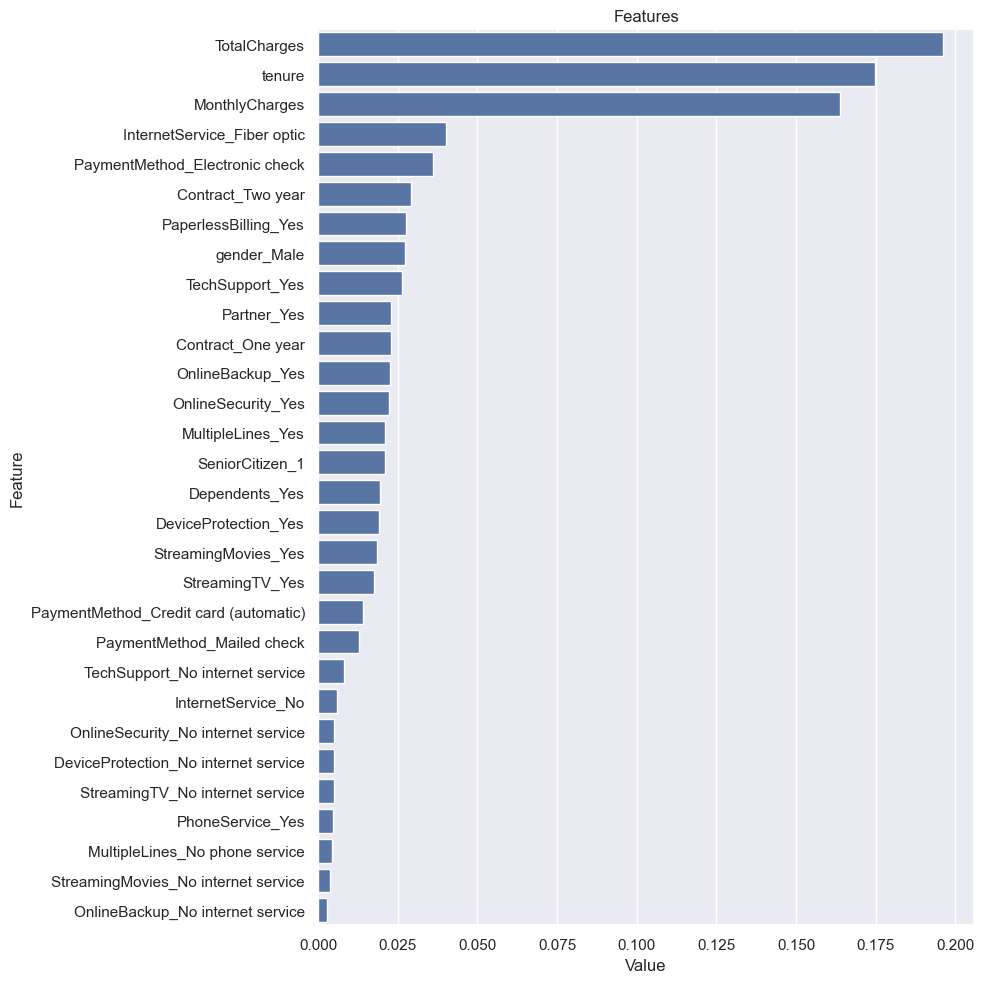

In [639]:
def importance_ploting(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


importance_ploting(rf_model, X_train)